# Coded Project - Problem 1 - Automobile

###### Context

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Objective of this project is to analyze the data to know the costumer demad and to enhance their experience.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [81]:
df=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Great Learning\2nd Month\Project\austo_automobile+29+29.xlsx")

In [77]:
pd.__version__

'2.0.3'

In [78]:
np.__version__

'1.24.3'

In [3]:
df.shape

(1581, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
# Checking for duplicate data

dups = df.duplicated()
df[dups]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [86]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [87]:
df = pd.DataFrame(df)
df = df.replace(['Femal'], 'Female')
df = df.replace(['Femle'], 'Female')

In [88]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [89]:
df.isnull().sum()[df.isnull().sum()>0]

Gender             53
Partner_salary    106
dtype: int64

In [94]:
mode=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode)

In [92]:
median=df["Partner_salary"].median()
df["Partner_salary"].replace(np.nan,median,inplace=True)

In [95]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [97]:
# Describing the data
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [98]:
# checking for the missing values
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

(array([419., 312., 248.,  87., 107., 131., 108.,  71.,  29.,  69.]),
 array([22. , 25.2, 28.4, 31.6, 34.8, 38. , 41.2, 44.4, 47.6, 50.8, 54. ]),
 <BarContainer object of 10 artists>)

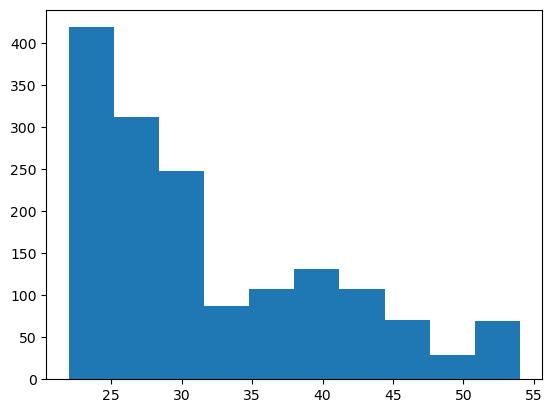

In [105]:
# simple way to plot the histogram
plt.hist(data=df, x='Age')

In [106]:
# function to create a good, interpretable histogram
def plot_histogram(df, column_name, bin_range, fig_size=(12, 6), color='blue', edgecolor='black'):
    """
    Plots a histogram for the specified column in the DataFrame with custom bin settings.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column to plot the histogram for.
        bin_range (tuple): Tuple representing the bin range as (start, end, interval).
        fig_size (tuple): Tuple representing the figure size (width, height). Default is (12, 6)
        color (str): Color of the histogram bar. Default is blue
        edgecolor (str): Color of the histogram bar edges. Default is black

    Returns:
        None (displays the histogram plot).
    """
    data = df[column_name]
    start, end, interval = bin_range
    bins = [i for i in range(start, end + interval, interval)]

    # Set the figure size
    plt.figure(figsize=fig_size)

    # Plot histogram
    plt.hist(data, bins=bins, color=color, edgecolor=edgecolor)

    # Add count annotations on top of the bars
    for i in range(len(bins) - 1):
        count = ((data >= bins[i]) & (data < bins[i + 1])).sum()
        plt.text((bins[i] + bins[i + 1]) / 2, count, str(count), ha='center')

    # Customize the plot
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column_name}')
    plt.xticks(bins)
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

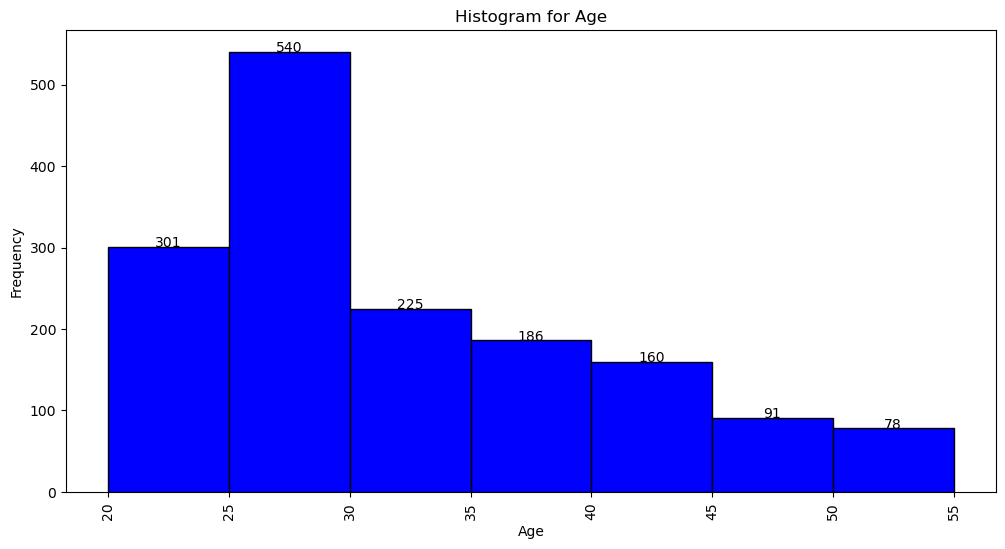

In [107]:
plot_histogram(df,'Age',(20,55,5))

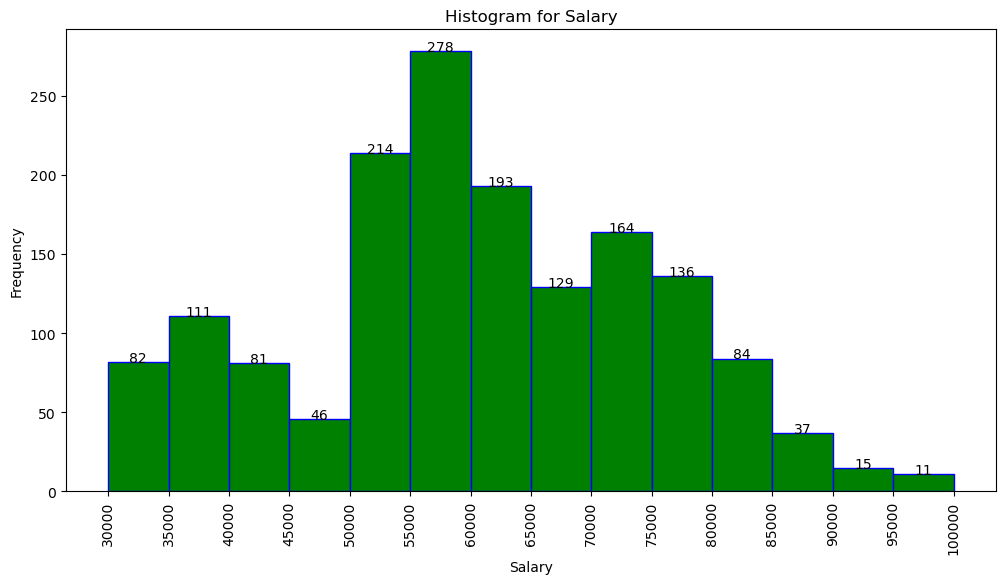

In [108]:
# Creating histogram for salary
plot_histogram(df, 'Salary', (30000,99300,5000), color='green', edgecolor='blue')

### We can clearly see that there are 278 costumers  income lies between 55000 to 60000 and 214 car owner with a income 50000-55000.
### Also there are 11 costmers whose income lies between 95000 - 100000.

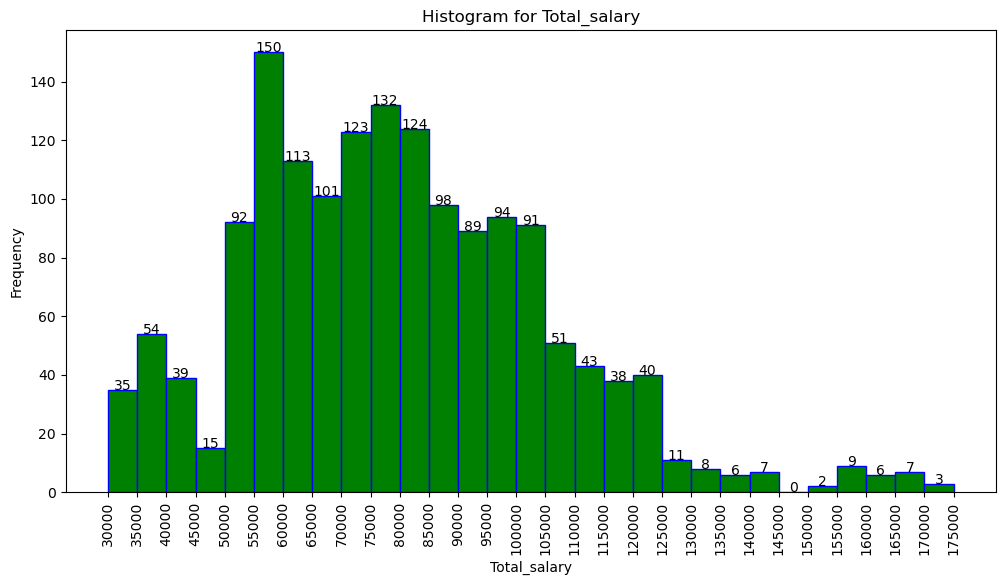

In [109]:
# Creating histogram for Total_salary
plot_histogram(df, 'Total_salary', (30000,171000,5000),color='green', edgecolor='blue')

### We can clearly see that there are 150 costumers total income lies between 55000 to 60000 and 132 car owner with a income 75000-80000.
### Also there 0 costumers whose total income lies between 145000 - 150000..

<Axes: xlabel='No_of_Dependents', ylabel='count'>

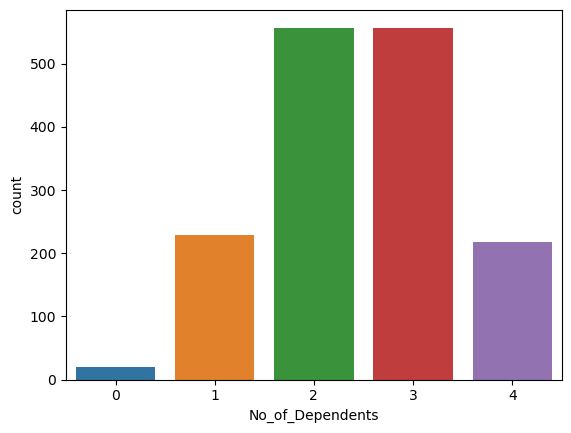

In [110]:
# Creating histogram for No_of_Dependent
sns.countplot(data=df,x='No_of_Dependents')

### We can clearly see that there more than 500 costumers with 3 dependents and less than 100 with 0 dependents.

E:\CAE\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


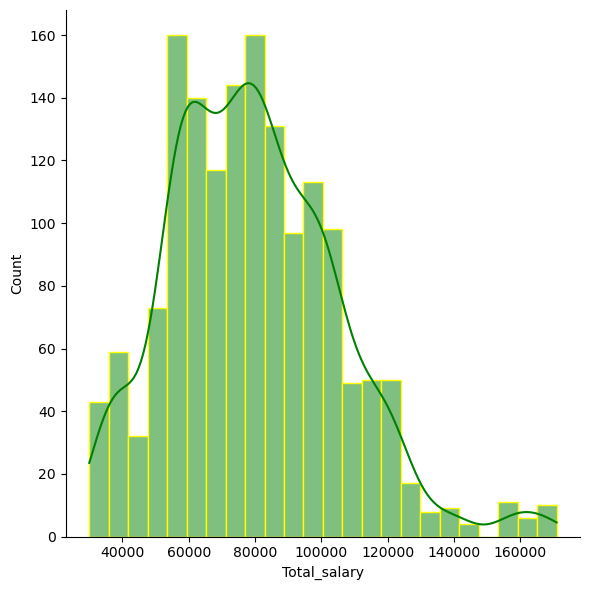

In [111]:
# creating the displot for "Total_salary"
sns.displot(
    data=df, x="Total_salary",
    height=6, aspect=1, kde=True, color="green", edgecolor="yellow"
)


In [112]:
# calculating skewness of "Total_salary"
round(df['Total_salary'].skew( ),2)

0.61

### - If we check the summary the mean is 79625.9 with standard deviation of 25545.8.
### - And from the above plot it can clearly be observed that it is No skewed.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'No_of_Dependents'),
  Text(2, 0, 'Salary'),
  Text(3, 0, 'Partner_salary'),
  Text(4, 0, 'Total_salary'),
  Text(5, 0, 'Price')])

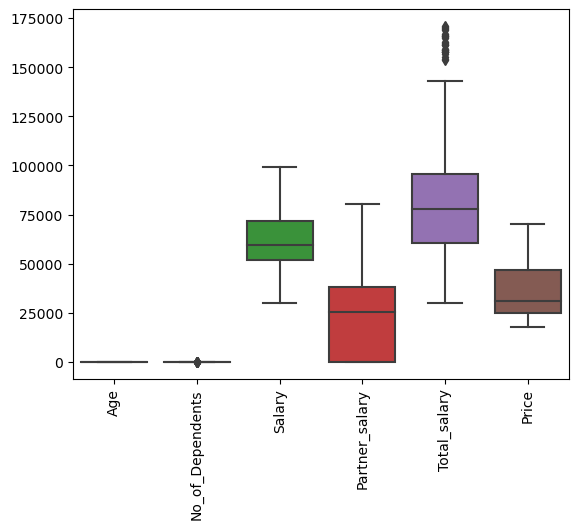

In [113]:
# creating barplot of all coloumns for checking outliers.
sns.boxplot(data=df)
plt.xticks(rotation=90)

### From the above boxplot it can seen that the outliers are in No of Dependents & Total salary

In [119]:
df['Total_salary'].describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [121]:
Q1=df['Total_salary'].quantile(0.25)
Q3=df['Total_salary'].quantile(0.75)
IQR=Q3-Q1
(df['Total_salary'] >(Q3+1.5*IQR)).sum()

27

<Axes: xlabel='No_of_Dependents'>

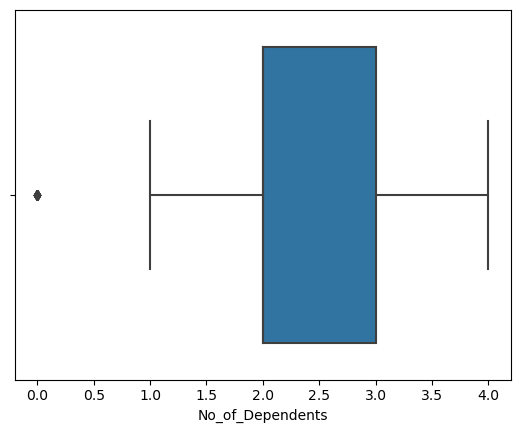

In [20]:
# creating barplot for No of Dependents
sns.boxplot(data=df, x='No_of_Dependents')

<Axes: xlabel='Total_salary'>

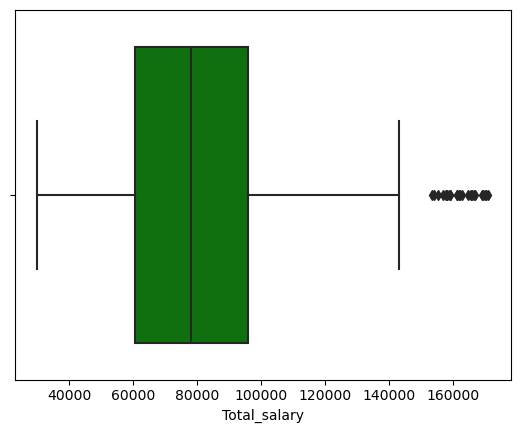

In [101]:
# creating barplot for Total Salary
sns.boxplot(data=df, x='Total_salary', color='green')

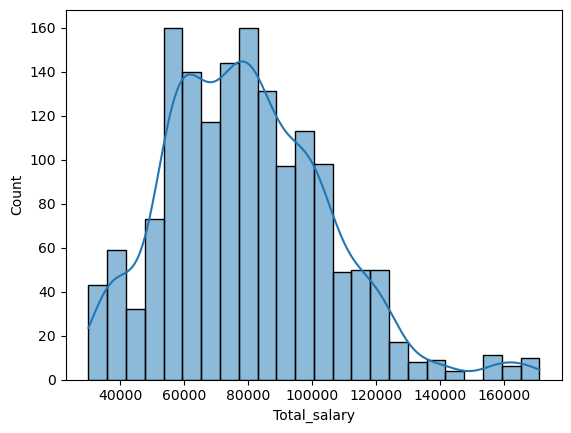

In [102]:
sns.histplot(data=df, x='Total_salary',kde = True);

Text(0.5, 0, 'Total_salary')

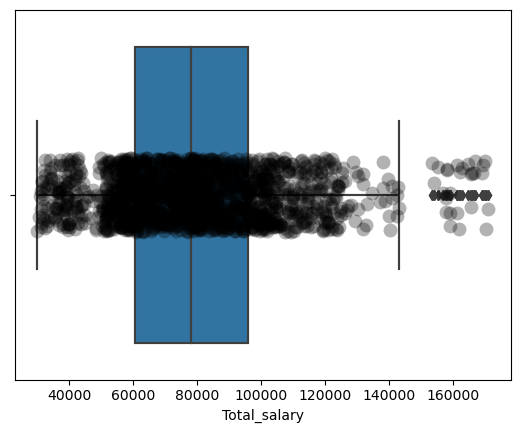

In [3]:
sns.boxplot(data=df, x="Total_salary")
sns.boxplot(x="Total_salary", data=df)
sns.stripplot(x="Total_salary", color='black',
              size=10, alpha=0.3, data=df)
plt.xlabel("Total_salary", size=10)

### - From the above boxplot it can clearly been seen that there are outliers in the data.
### - Therefore, outliers should be treated here, so as to get correct picture of the data on which further analysis can be done.
### - Let us check the same for remaining variables.

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


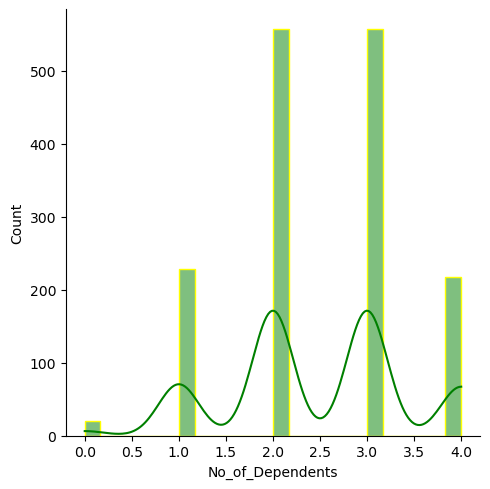

In [23]:
# creating the displot for "No_of_Dependents"
ax=sns.displot(data=df,x="No_of_Dependents", height=5, kde=True, color='green', edgecolor='yellow')

In [24]:
# calculating skewness of "No_of_Dependents"
round(df['No_of_Dependents'].skew( ),2)

-0.13

Text(0, 0.5, 'No_of_Dependents')

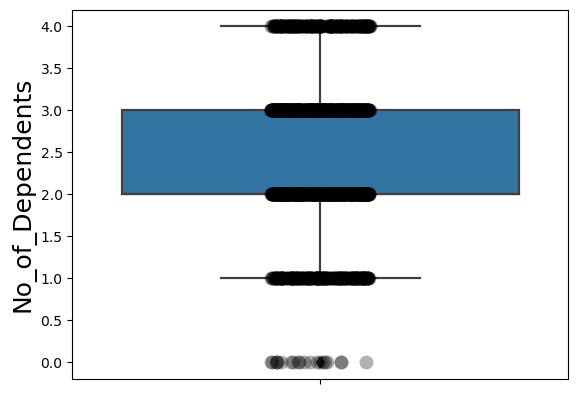

In [25]:
sns.boxplot(data=df, y="No_of_Dependents", color='green')
sns.boxplot(y="No_of_Dependents", data=df)
sns.stripplot(y="No_of_Dependents", color='black',
              size=10, alpha=0.3, data=df)
plt.ylabel("No_of_Dependents", size=18)

### - From the above boxplot we can see that there are few outliers in the data.

In [18]:
summary =df.describe().T
summary['IQR']=summary['75%']-summary['25%']
summary['LW']=summary['25%']-1.5*summary['IQR']
summary['UW']=summary['75%']+1.5*summary['IQR']
summary

,count,mean,std,min,25%,50%,75%,max,IQR,LW,UW
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0,13.0,5.5,57.5
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0,1.0,0.5,4.5
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0,19900.0,22050.0,101650.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0,38300.0,-57450.0,95750.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0,35400.0,7400.0,149000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0,22000.0,-8000.0,80000.0


## Univariant Analysis

### There are 8 categorical variables. Gender, Profession, Marital_status, Education, Personal_loan, House_loan, Partner_working,  Make  


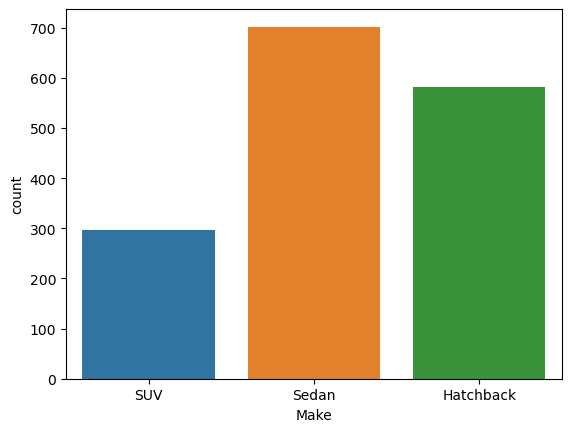

In [20]:
sns.countplot(data=df,x='Make');

In [4]:
# function to create a good, interpretable bar graph/plot
def labeled_barplot(data, feature, perc=False, n=None, hue=None, figsize=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: variable in the data to map plot aspects to different colors (default is None)
    figsize: tuple, optional, size of the figure (default is None)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if figsize is None:
        figsize = (count + 2, 6) if n is None else (n + 2, 6)

    plt.figure(figsize=figsize)
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,  # Add hue parameter here
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

        # Add hue parameter to plt.legend()
    if hue is not None:
        plt.legend(title=hue, bbox_to_anchor=(1, 1))
    plt.show()  # show the plot

## Bar-plot for "Make"

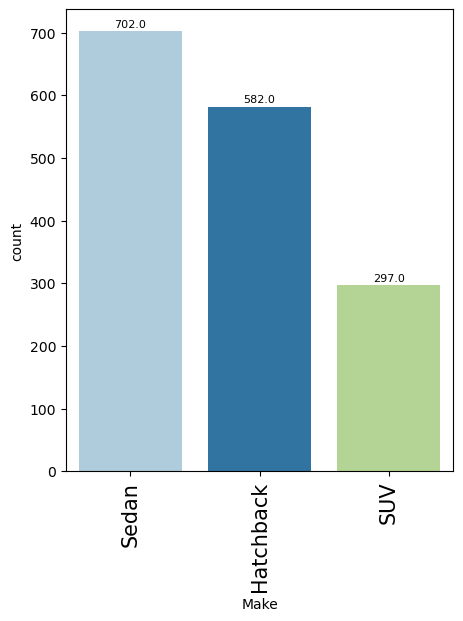

In [23]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Make')

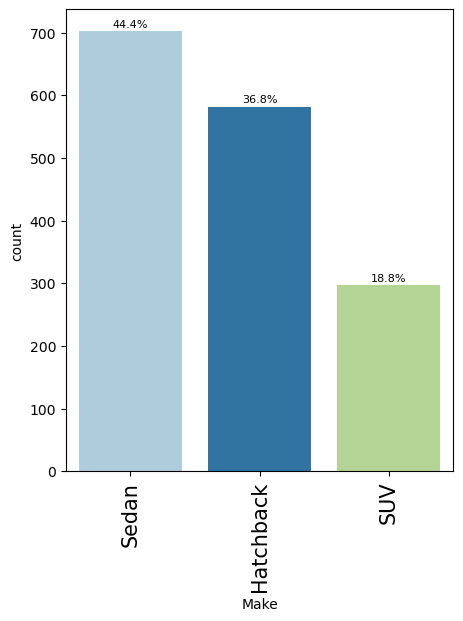

In [24]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Make', perc=True)

### - Here, the data shows that 44.4% are prefering Sedan, 36.8% are prefering Hatchback and 18.8% are prefering SUV.
### - In terms of count we have 702 are prefering Sedan, 582 are prefering Hatchback and 297 are prefering SUV.

## Bar-plot for "Gender" :

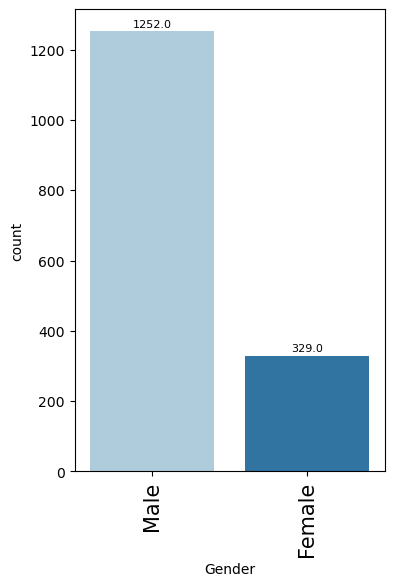

In [103]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Gender')

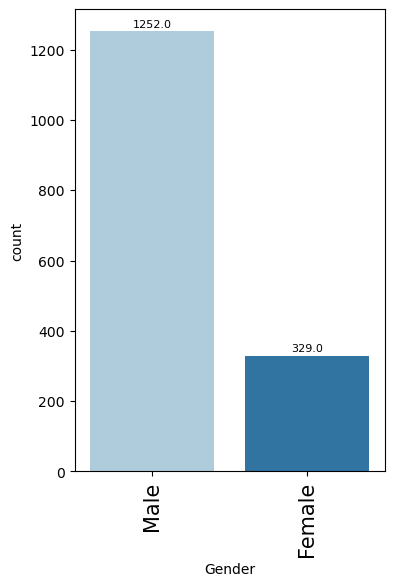

In [104]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Gender')

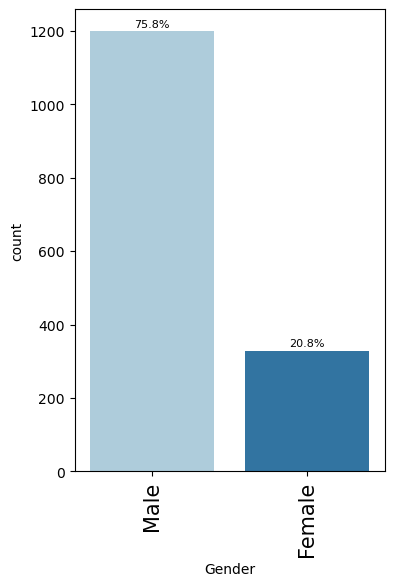

In [52]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Gender', perc=True)

### - Here, the data shows that 75.8% coustmers are Male and 20.8% are Female.
### - In terms of count we have 1199 are Males and 329 are Female.

### Bar-plot for "Marital Status" :

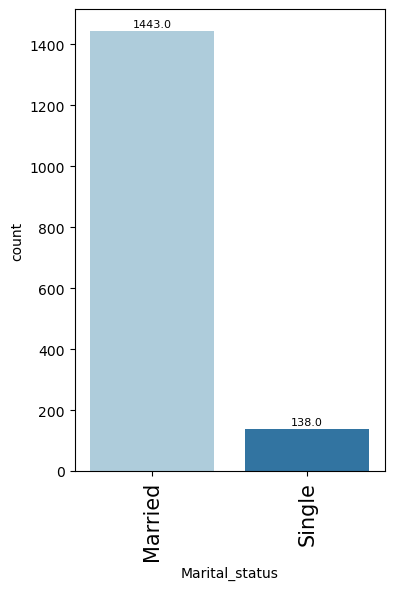

In [53]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Marital_status')

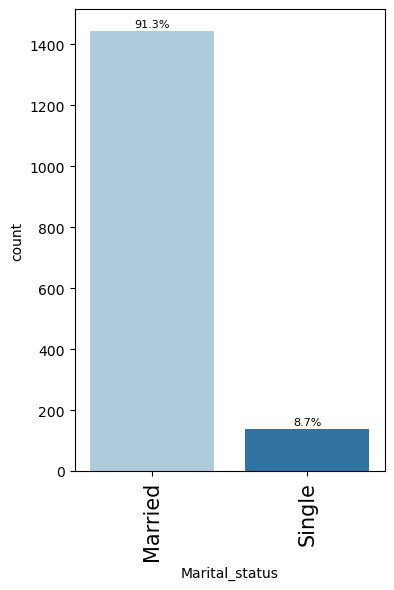

In [54]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Marital_status', perc=True)

### - The data reveals that 91.3% of the coustmers are married, while only a very small percentage (8.7%) are singles.
### - Specifically, there are 1143 marries and only 138 single coustmers based on the count.

## Bar-plot for "Education" :

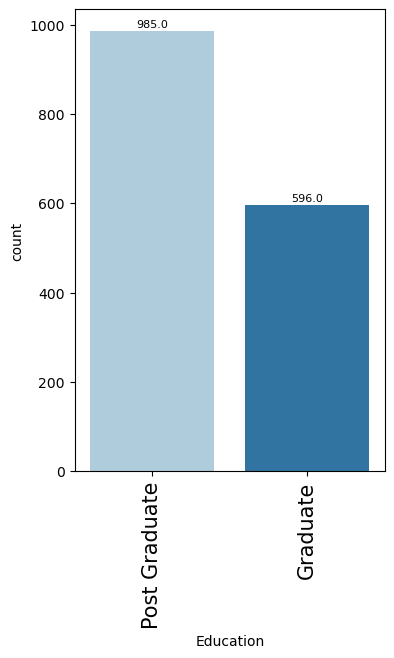

In [55]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Education')

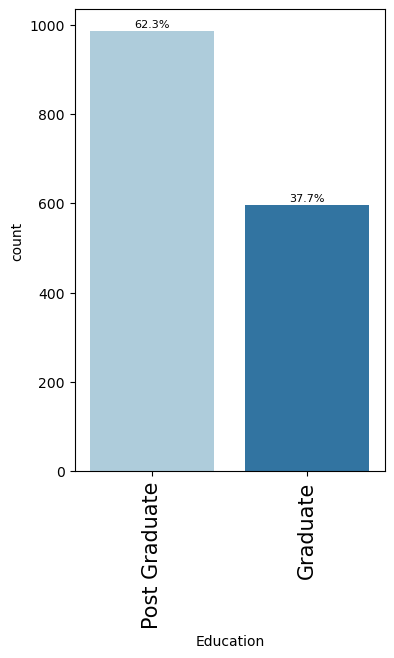

In [56]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Education', perc=True)

### - The data reveals that 62.3% of coustmers are Post Graduates and 37.7% are Graduates.
### - Specifically, there are 985 post graduates and 596 graduates based on the count.

## Bar-plot for "Profession" :

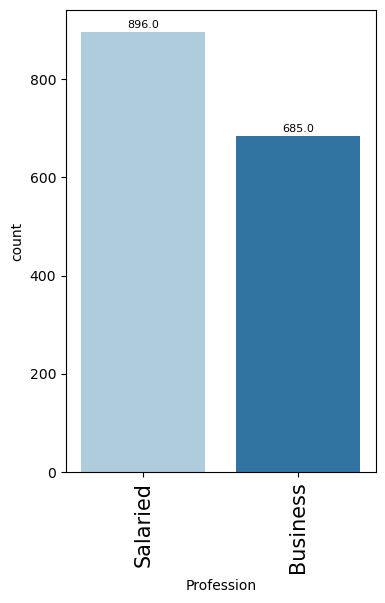

In [57]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Profession')

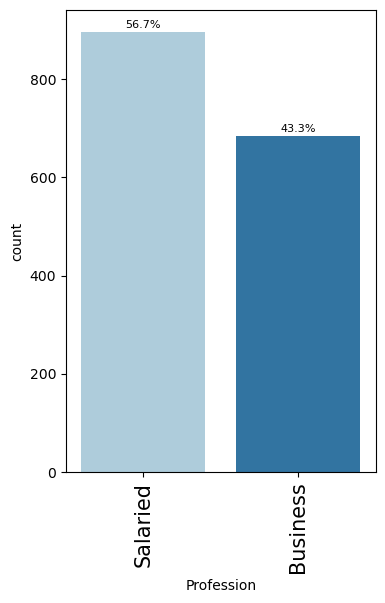

In [58]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Profession', perc=True)

### - The data reveals that 56.7% of coustmers are Salaried and 43.3% are doing business.
### - Specifically, there are 896 salaried costumers and 685 business costumers based on the count.

## Bar-plot for "Personal Loan" :

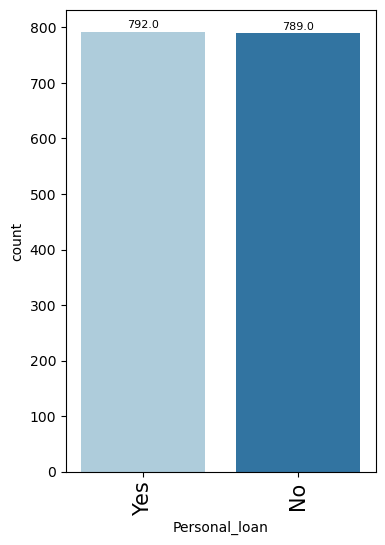

In [60]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Personal_loan')

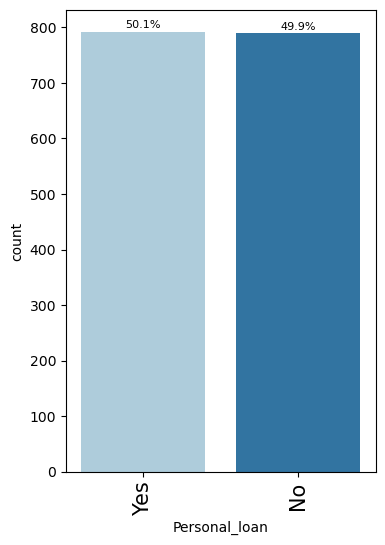

In [61]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Personal_loan', perc=True)

### - The data reveals that the coustmers with and without personal loan are almost same with 50.1% & 49.9%.
### - Specifically, there are 792 & 789 costumers with & without personal loan based on the count.

## Bar-plot for "House Loan" :

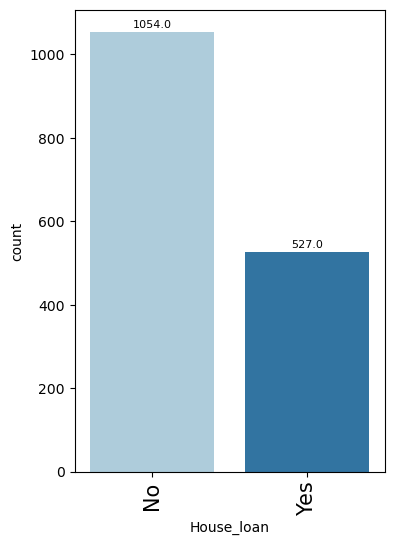

In [62]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'House_loan')

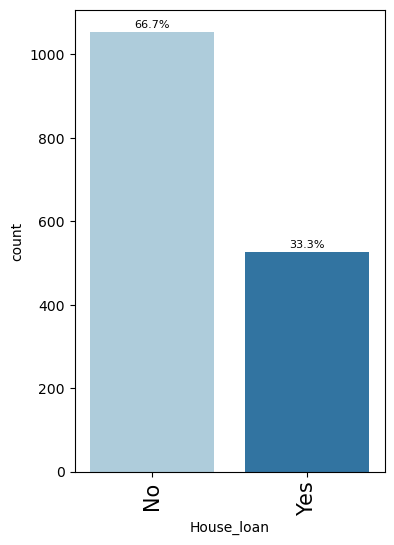

In [63]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'House_loan', perc=True)

### - The data reveals that there are 66.7% costumers without House loan and 33.3% costumers with house loan are almost same with 50.1% & 49.9%.
### - Specifically, there are 527 & 1054 costumers with & without house loan based on the count.

## Bar-plot for "Partner Working" :

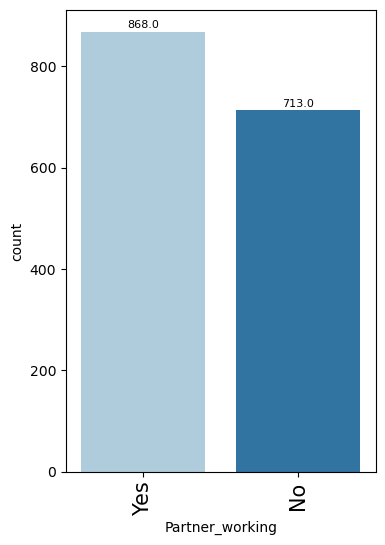

In [64]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Partner_working')

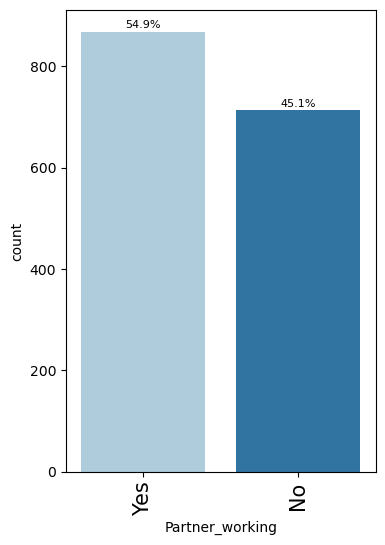

In [66]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Partner_working', perc=True)

### From the above graphs, it can be observed that  54.9% costumer parners are working.
### Based on count, 868 costumers partners are working & 713 costumers partners are working 

## Bivariant Analysis

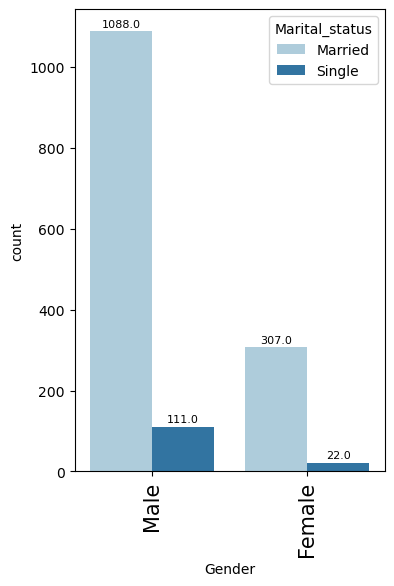

In [67]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Gender', hue='Marital_status')

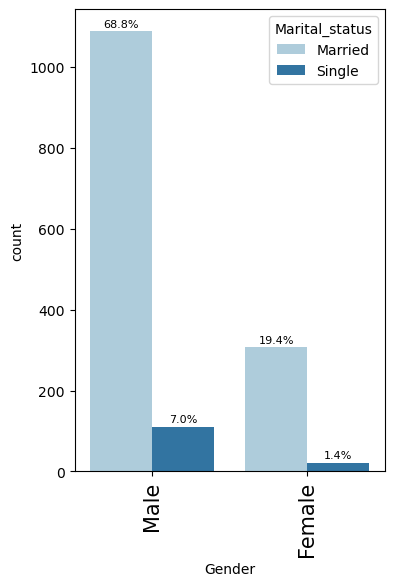

In [68]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Gender', hue='Marital_status', perc=True)

### - From the above plot it can be seen that most of the males whether married or unmarried have same frequency in terms of buying a car.

### - However, for both females & males it can be observed that those who are married have high frequency of buying cars than singles.

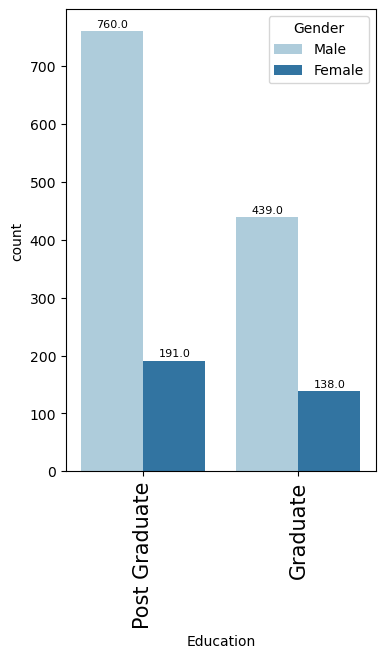

In [69]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Education', hue='Gender')

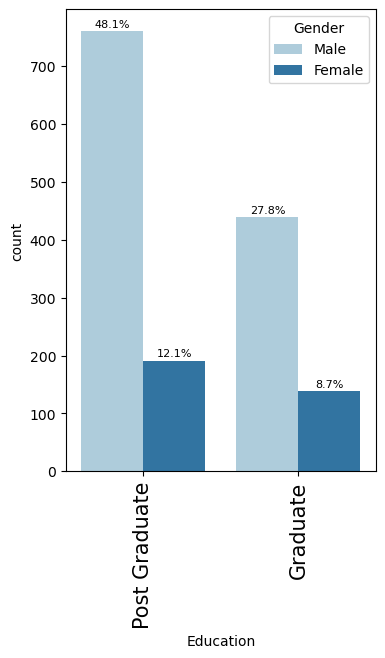

In [70]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Education', hue='Gender',perc=True)

### - Looking at the graph above, it's noticeable that there are more males than females in both post graduate and graduate education categories.
### - In the both categories, females are less than males in number.

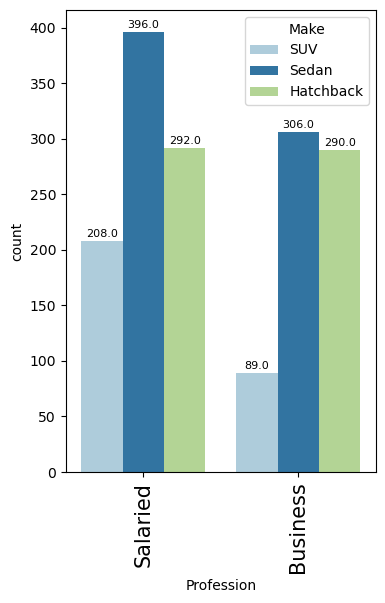

In [12]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Profession', hue='Make')

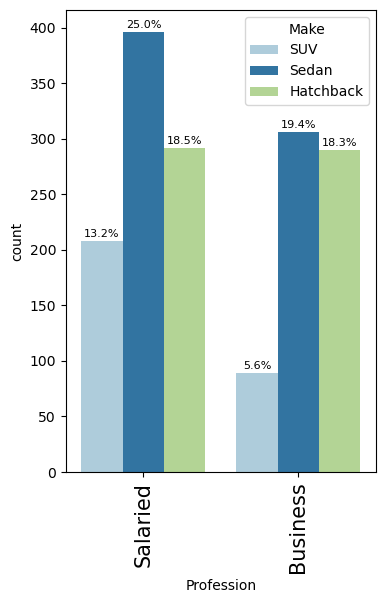

In [13]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Profession', hue='Make',perc=True)

###  Based on the above data, salaried costumers opt for Sedan & SUV.
### Hatchback is equally opted by both salaried & business costumers.
### But costumers doing business preffer to buy Hatchback & Sedan

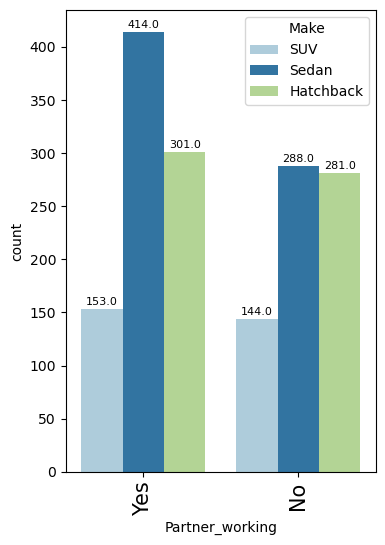

In [123]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Partner_working', hue='Make')

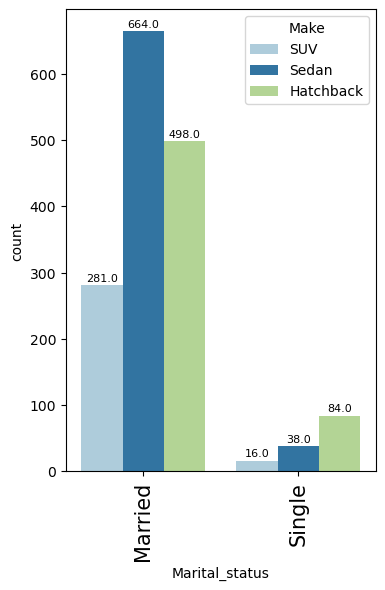

In [124]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Marital_status', hue='Make')

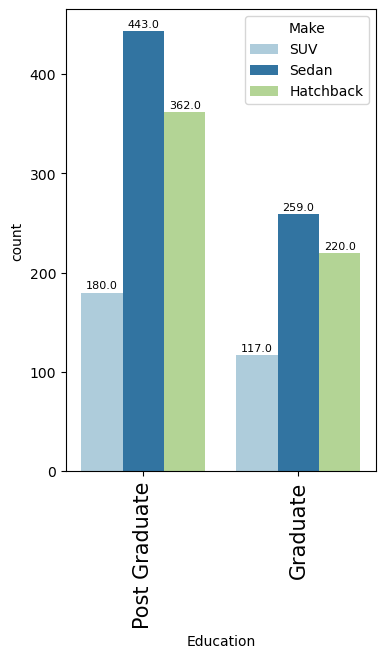

In [125]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Education', hue='Make')

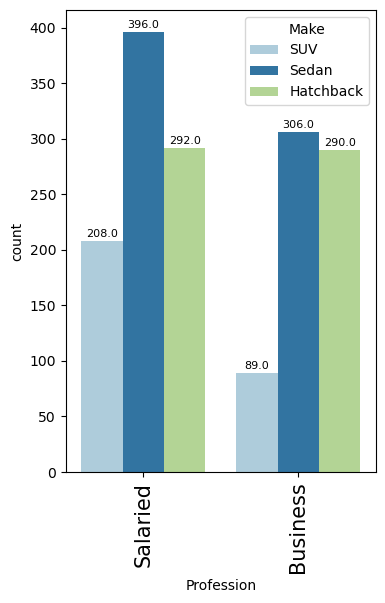

In [126]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Profession', hue='Make')

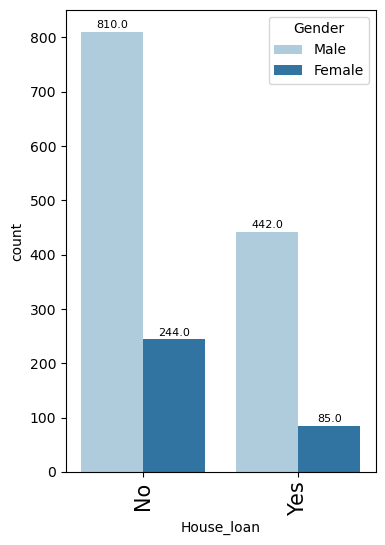

In [131]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'House_loan', hue='Gender')

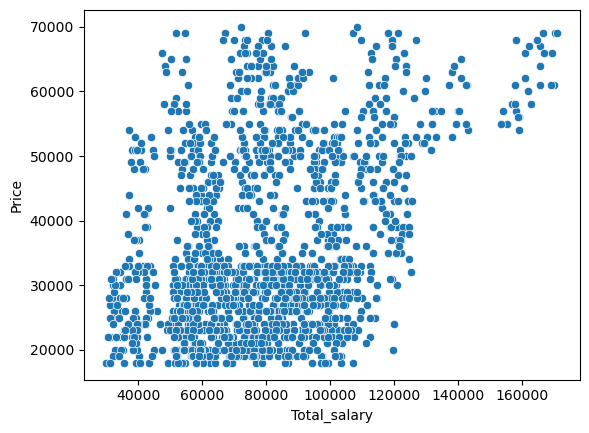

In [128]:
sns.scatterplot(data=df, x='Total_salary', y='Price');

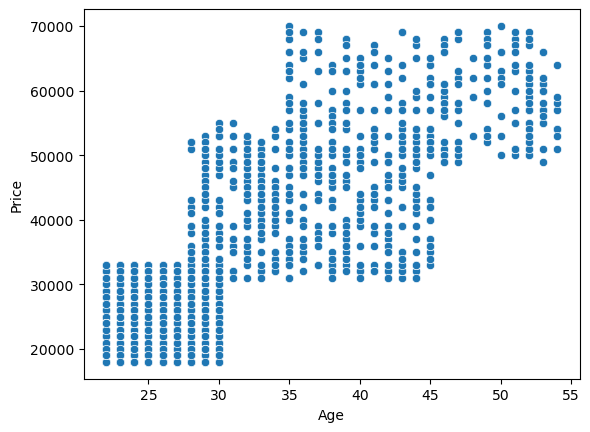

In [129]:
sns.scatterplot(data=df, x='Age', y='Price');

<Axes: xlabel='Total_salary', ylabel='Make'>

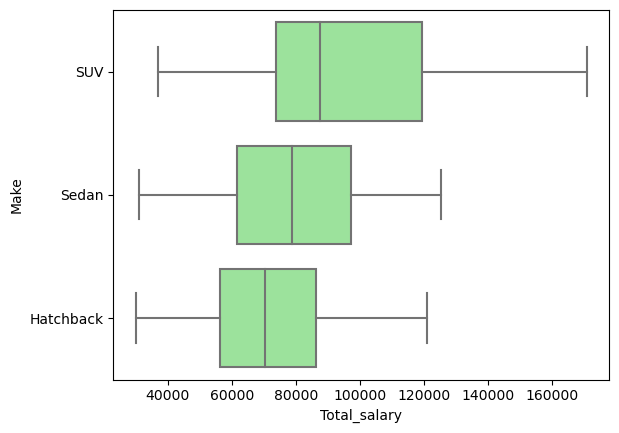

In [20]:
# checking for the outlier on region using Boxplot
sns.boxplot(data=df, x= 'Total_salary', y='Make', color='lightgreen')

Text(0.5, 0, 'Tota_salary')

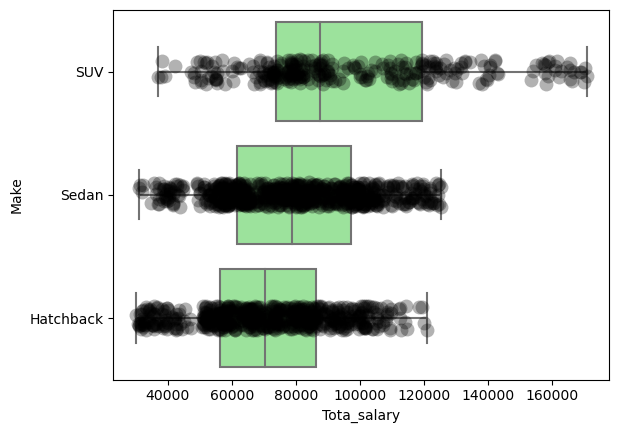

In [34]:
sns.boxplot(data=df, x= 'Total_salary', y='Make', color='lightgreen')
sns.stripplot(data=df,x="Total_salary", y='Make',color='black',size=10, alpha=0.3)
plt.xlabel("Tota_salary", size=10)

### As we can clearly see from the above graph, that there are no outliers.

<Axes: xlabel='Price', ylabel='Make'>

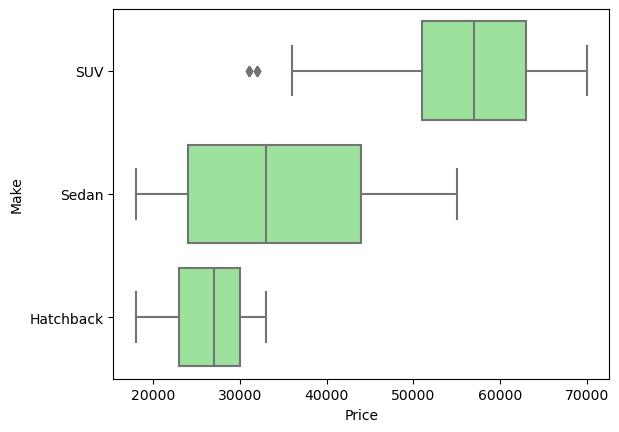

In [32]:
# checking for the outlier on region using Boxplot
sns.boxplot(data=df, x= 'Price', y='Make', color='lightgreen')

Text(0.5, 0, 'Price')

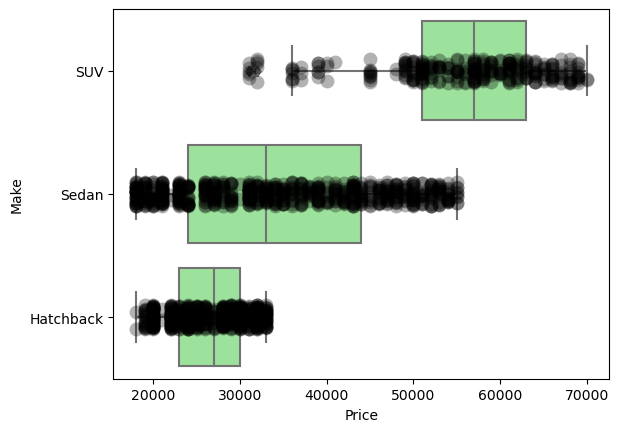

In [35]:
sns.boxplot(data=df, x= 'Price', y='Make', color='lightgreen')
sns.stripplot(data=df,x="Price", y='Make',color='black',size=10, alpha=0.3)
plt.xlabel("Price", size=10)

## Check Correlation

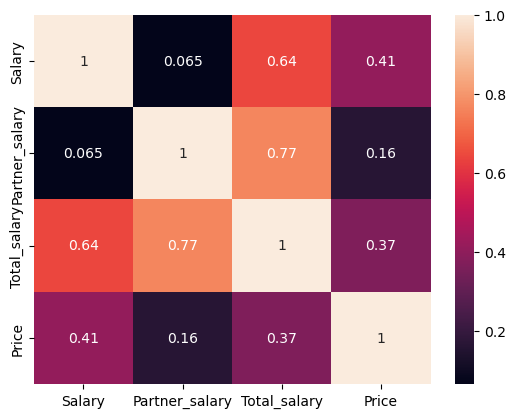

In [130]:
sns.heatmap(data=df[['Salary','Partner_salary','Total_salary','Price']].corr(), annot=True,);

## 1. Do men tend to prefer SUVs more compared to women?

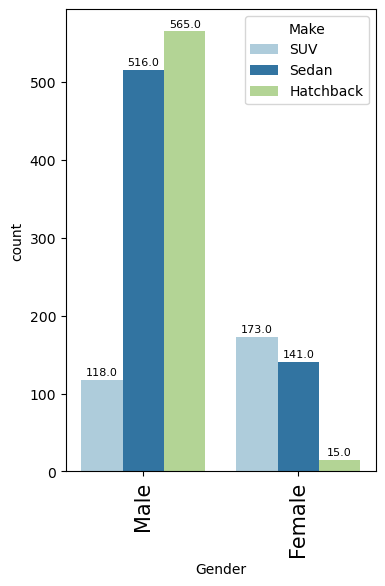

In [36]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Gender', hue='Make')

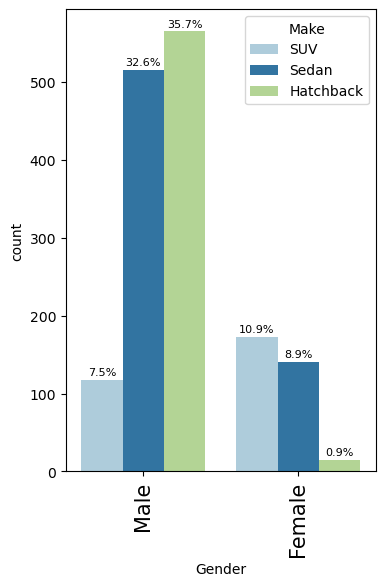

In [37]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Gender', hue='Make',perc=True)

### Yes, Men tend to prefer SUVs more compared to women

## 2. What is the likelihood of a salaried person buying a Sedan?

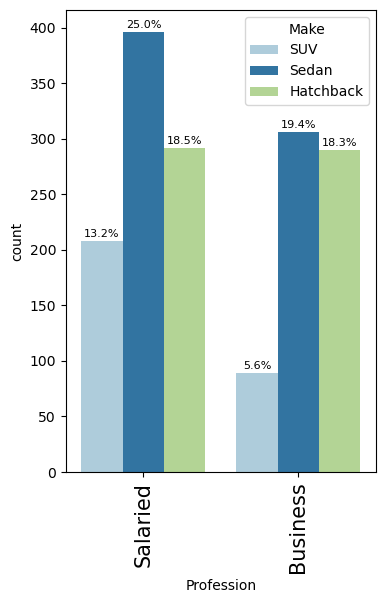

In [38]:
# calling the function defined above to create the bar graph/plot to show proportions instead of actual counts.
labeled_barplot(df, 'Profession', hue='Make',perc=True)

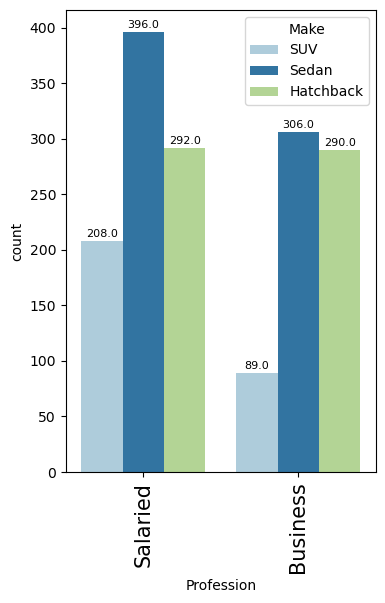

In [132]:
labeled_barplot(df, 'Profession', hue='Make')

### The liklihood of salaried person buying a sedan is 25%.

## 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


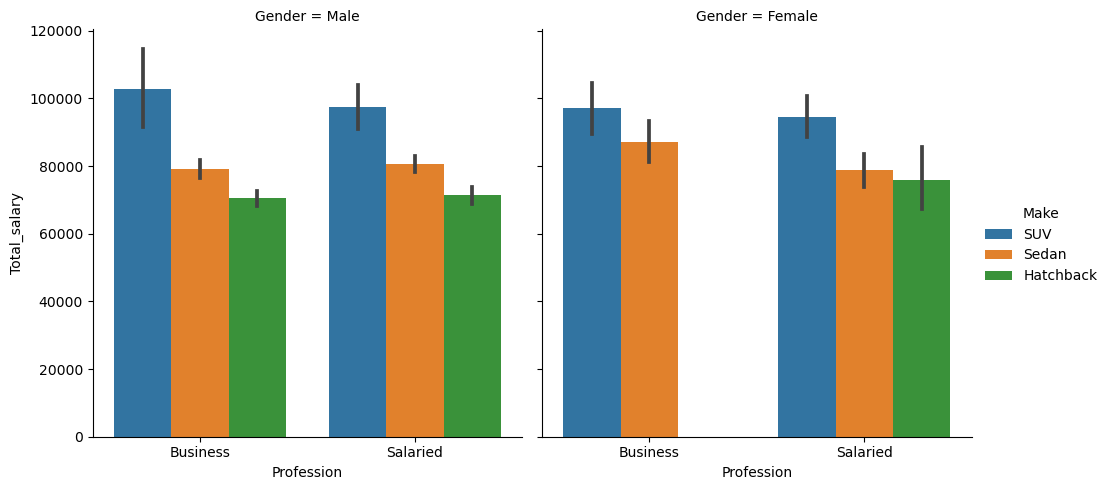

In [51]:
# checking for the outlier on region using catplot
sns.catplot(data=df, x="Profession", y="Total_salary", col="Gender",hue="Make", kind='bar');

### Yes, salaried men are easier target for suv sale over sedan sale.

## 4. How does the the amount spent on purchasing automobiles vary by gender? 

In [135]:
df.groupby(['Gender'])['Price'].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

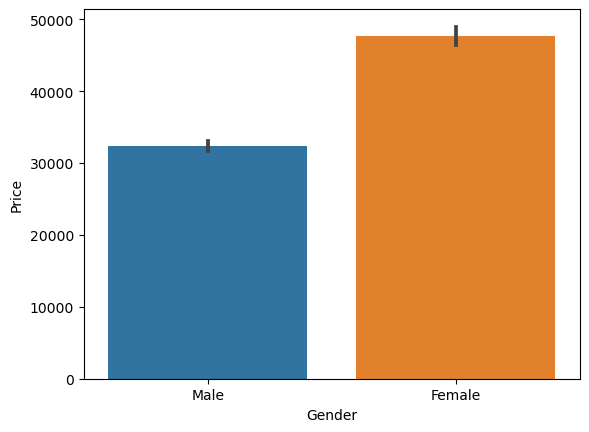

In [133]:
# checking for the outlier on region using barplot
sns.barplot(data=df, x="Gender", y="Price");

### Male spent more amount in purchasing cars than women.

In [64]:
df.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32817.347790
Name: Price, dtype: float64

### But when we see amount spend by individual based on Gender the Female is spendingmore  amount  than male

## 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [78]:
df.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

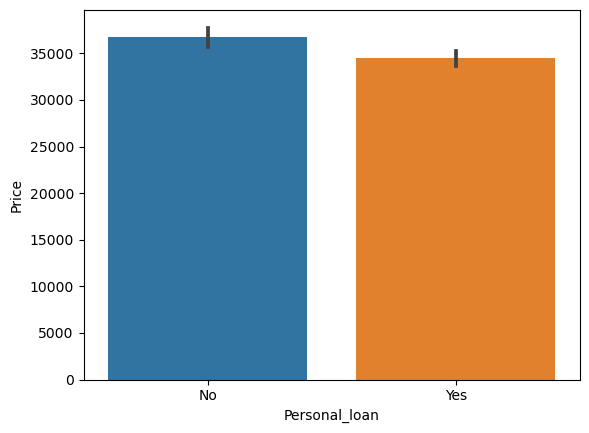

In [73]:
# checking for the outlier on region using barplot
sns.barplot(data=df, x="Personal_loan", y="Price");

### Similar range of amount is spent on purchasing automobiles by both the people having and not having the personal loan

## 6. How does having a working partner influence the purchase of higher-priced cars?

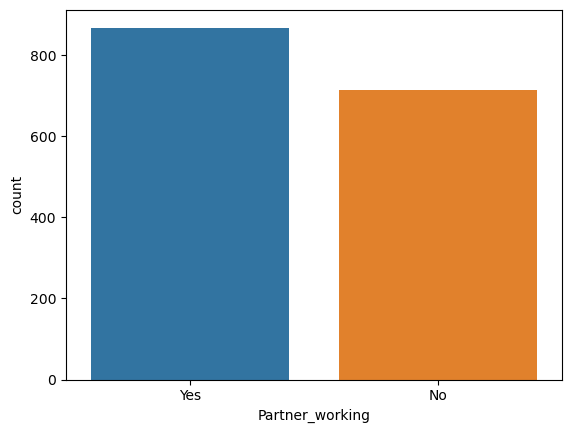

In [74]:
# checking for the outlier on region using barplot
sns.countplot(data=df, x="Partner_working");

In [82]:
df[('Partner_working')].value_counts(sort=True)

Partner_working
Yes    868
No     713
Name: count, dtype: int64

In [96]:
df.groupby(['Partner_working'])['Price'].sum()

Partner_working
No     25668000
Yes    30612000
Name: Price, dtype: int64

In [97]:
df.groupby(['Partner_working'])['Price'].max()

Partner_working
No     70000
Yes    70000
Name: Price, dtype: int64

In [98]:
df.groupby(['Partner_working'])['Price'].mean()

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

In [99]:
df.groupby(['Partner_working'])['Price'].median()

Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


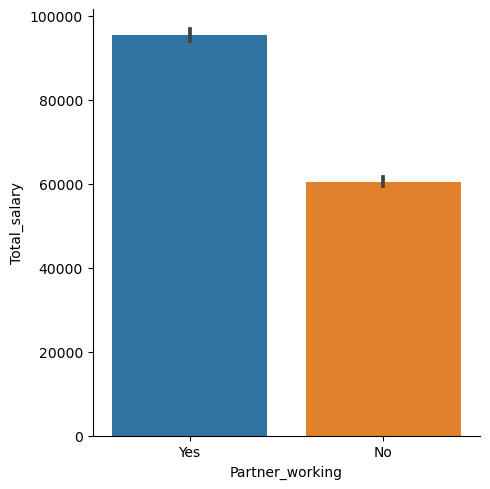

In [94]:
# checking for the outlier on region using catplot
sns.catplot(data=df, x="Partner_working", y="Total_salary", kind='bar');

### Maximum Price, Median of price for partner working and not working is same value, of price for partner working and not working is not having much difference

## Actionable Insights & Recommendations

### The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [24]:
df.groupby('Gender')['Marital_status'].value_counts()

Gender  Marital_status
Female  Married            307
        Single              22
Male    Married           1088
        Single             111
Name: count, dtype: int64

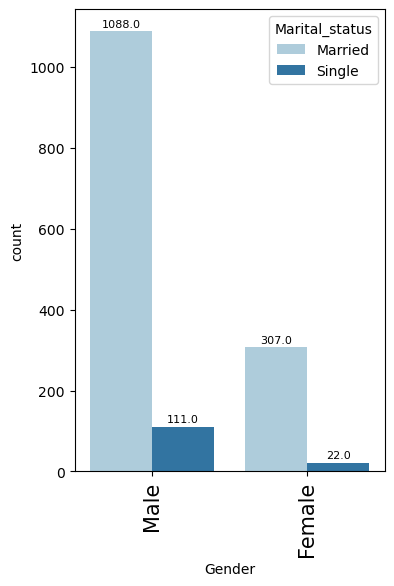

In [14]:
# calling the function defined above to create the bar graph/plot
labeled_barplot(df, 'Gender', hue='Marital_status')

### Both in Male and Female Gender the maximum number of cars are purchased by the Married people.

# Problem 2

In [2]:
df1=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Great Learning\2nd Month\Project\godigt_cc_data.xlsx")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [4]:
df1.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [43]:
# Checking for duplicate data

dups = df1.duplicated()
df1[dups]

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit


E:\CAE\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


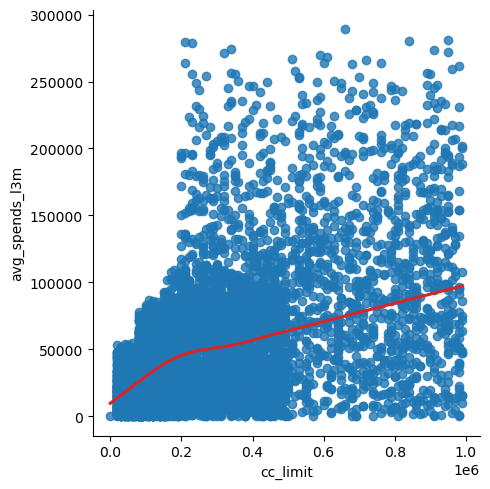

In [45]:
sns.lmplot(data=df1, x='cc_limit', y='avg_spends_l3m',lowess=True, line_kws={"color": "C3"});

E:\CAE\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


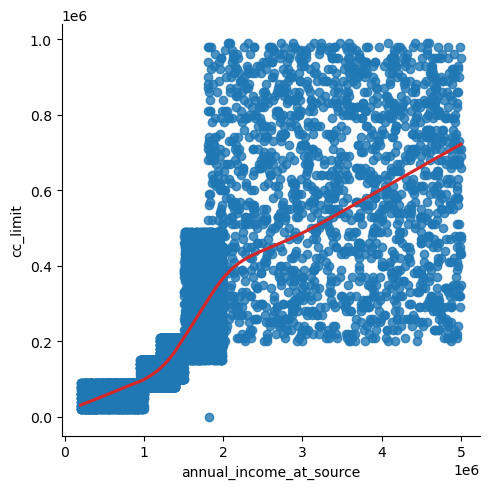

In [46]:
sns.lmplot(data=df1, x='annual_income_at_source', y='cc_limit',lowess=True, line_kws={"color": "C3"});

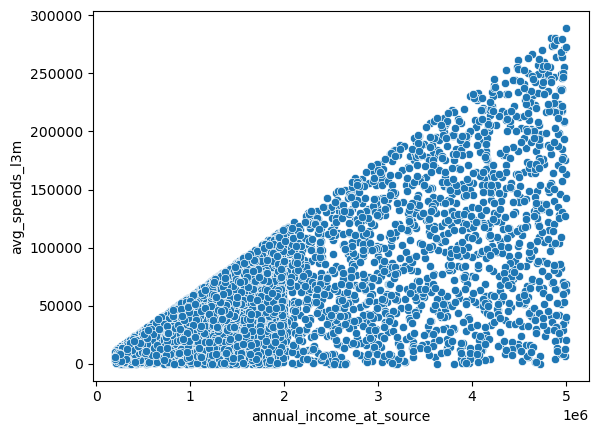

In [47]:
sns.scatterplot(data=df1, x='annual_income_at_source', y='avg_spends_l3m');

### There is positive co-relation between ‘annual_income_at_source’ and ‘cc_limit’ therefore the user having more ‘annual_income_at_source’ will spend more and hence not be attrite

In [48]:
df1['card_type'].unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'edge'),
  Text(1, 0, 'prosperity'),
  Text(2, 0, 'rewards'),
  Text(3, 0, 'indianoil'),
  Text(4, 0, 'cashback'),
  Text(5, 0, 'shoprite'),
  Text(6, 0, 'chartered'),
  Text(7, 0, 'aura'),
  Text(8, 0, 'gold'),
  Text(9, 0, 'smartearn'),
  Text(10, 0, 'prime'),
  Text(11, 0, 'pulse'),
  Text(12, 0, 'platinum'),
  Text(13, 0, 'centurion'),
  Text(14, 0, 'elite')])

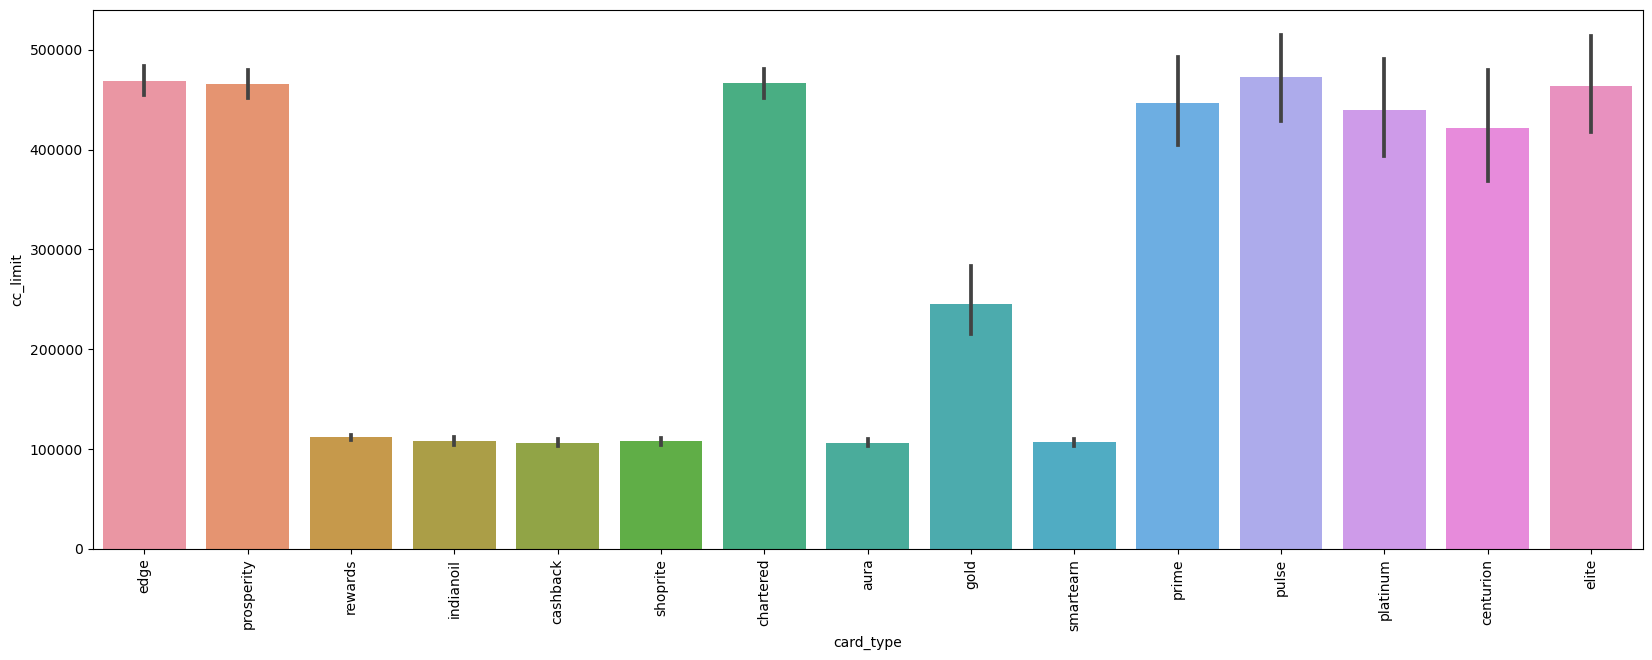

In [49]:
# checking for the barplot
plt.figure(figsize=(20,7))
sns.barplot(data=df1, x="card_type", y="cc_limit");
plt.xticks(rotation=90)

In [40]:
df1.groupby(['card_type'])['cc_limit'].sum()

card_type
aura           69380000
cashback       71720000
centurion      26140000
chartered     430380000
edge          459430000
elite          44530000
gold           35600000
indianoil      73550000
platinum       25940000
prime          50010000
prosperity    468920000
pulse          47720000
rewards       167500000
shoprite       74120000
smartearn      81480000
Name: cc_limit, dtype: int64

### Top 4 card types having more ‘cc_limit’ are
#### 1. Chartered
#### 2. prosperity
#### 3. edge
#### 4. rewards

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Self Employed'),
  Text(1, 0, '0'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Salaried'),
  Text(4, 0, 'Retired'),
  Text(5, 0, 'Housewife')])

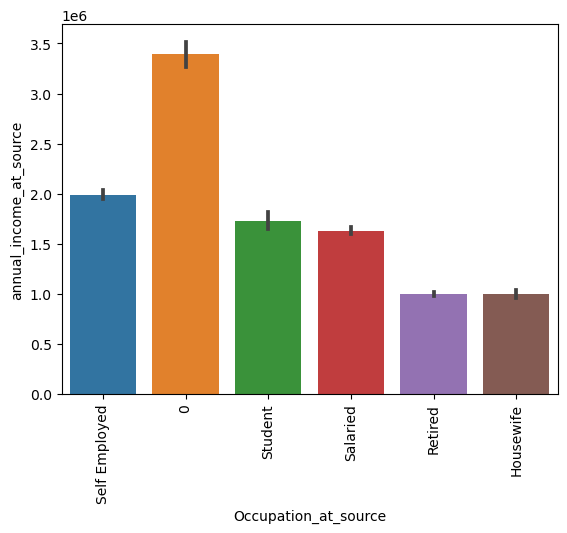

In [71]:
# checking for the barplot
sns.barplot(data=df1, x="Occupation_at_source", y="annual_income_at_source");
plt.xticks(rotation=90)

In [42]:
df1.groupby(['Occupation_at_source'])['annual_income_at_source'].sum()

Occupation_at_source
0                 885682388
Housewife         381504991
Retired          1085732289
Salaried         6394329966
Self Employed    4328466549
Student          1071260172
Name: annual_income_at_source, dtype: int64

### More ‘annual_income_at_source’ is there for the ‘Salaried’ and ‘Self Employed’ occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Self Employed'),
  Text(1, 0, '0'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Salaried'),
  Text(4, 0, 'Retired'),
  Text(5, 0, 'Housewife')])

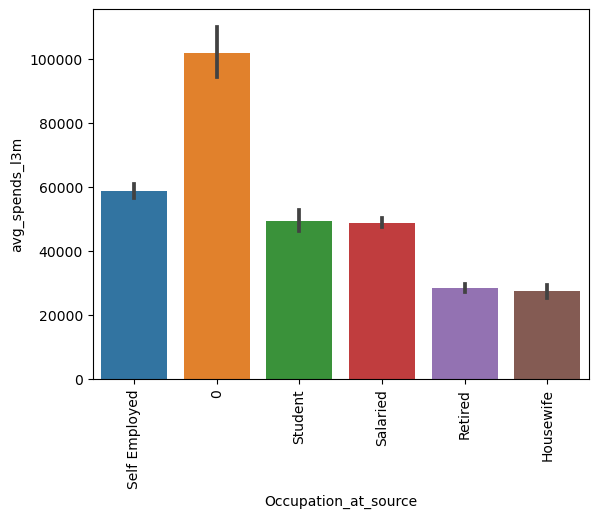

In [62]:
# checking for the barplot
sns.barplot(data=df1, x="Occupation_at_source", y="avg_spends_l3m");
plt.xticks(rotation=90)

In [63]:
df1.groupby(['Occupation_at_source'])['avg_spends_l3m'].sum()

Occupation_at_source
0                 26636048
Housewife         10531574
Retired           31118023
Salaried         191554231
Self Employed    127884163
Student           30683145
Name: avg_spends_l3m, dtype: int64

### The cards having higher cc_limit should be given to the users having ‘Salaried’ and ‘Self Employed’ occupation as more number of users are from these occupation, so that there is increase in avg_spends_l3m and and made sure that the card given to the customer is the right credit card.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'edge'),
  Text(1, 0, 'prosperity'),
  Text(2, 0, 'rewards'),
  Text(3, 0, 'indianoil'),
  Text(4, 0, 'cashback'),
  Text(5, 0, 'shoprite'),
  Text(6, 0, 'chartered'),
  Text(7, 0, 'aura'),
  Text(8, 0, 'gold'),
  Text(9, 0, 'smartearn'),
  Text(10, 0, 'prime'),
  Text(11, 0, 'pulse'),
  Text(12, 0, 'platinum'),
  Text(13, 0, 'centurion'),
  Text(14, 0, 'elite')])

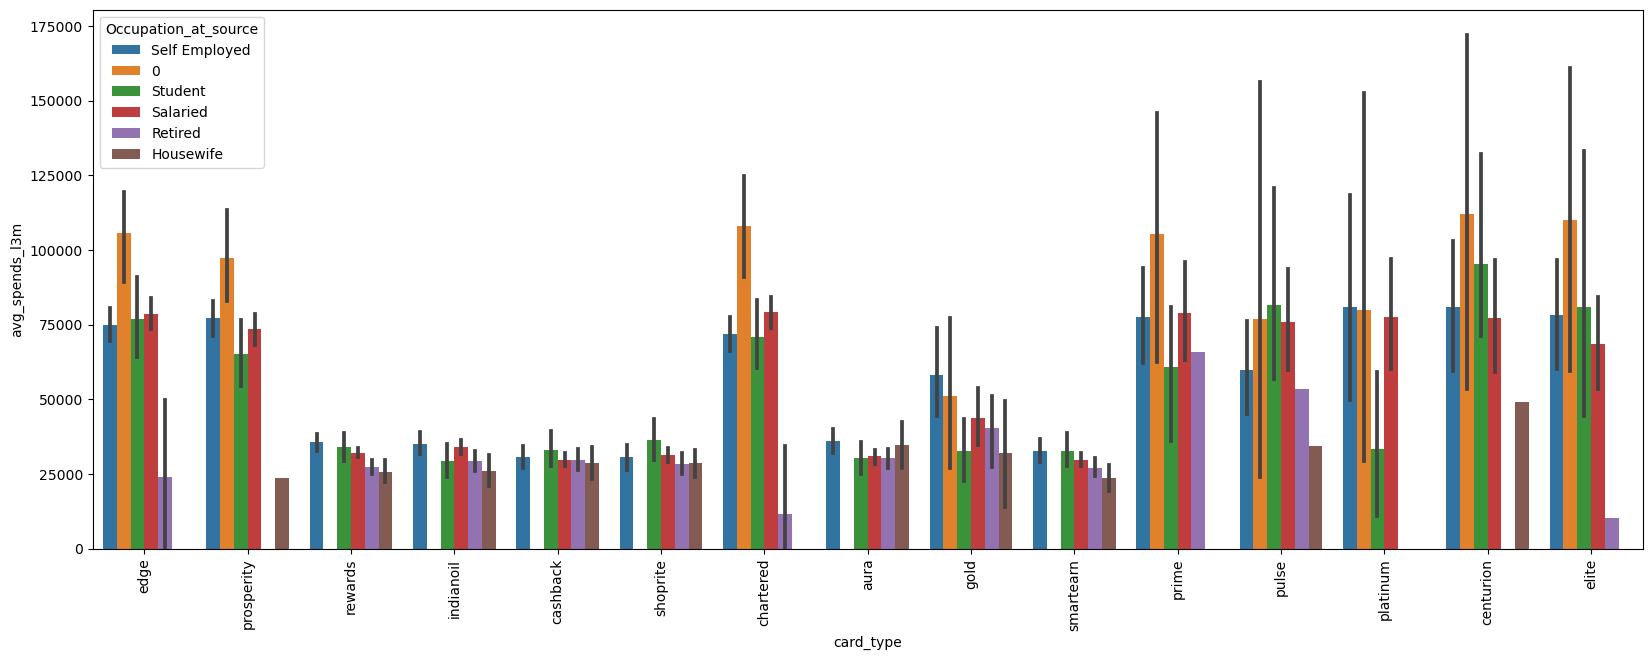

In [65]:
plt.figure(figsize=(20,7))
sns.barplot(data=df1, x="card_type", y="avg_spends_l3m", hue="Occupation_at_source");
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'edge'),
  Text(1, 0, 'prosperity'),
  Text(2, 0, 'rewards'),
  Text(3, 0, 'indianoil'),
  Text(4, 0, 'cashback'),
  Text(5, 0, 'shoprite'),
  Text(6, 0, 'chartered'),
  Text(7, 0, 'aura'),
  Text(8, 0, 'gold'),
  Text(9, 0, 'smartearn'),
  Text(10, 0, 'prime'),
  Text(11, 0, 'pulse'),
  Text(12, 0, 'platinum'),
  Text(13, 0, 'centurion'),
  Text(14, 0, 'elite')])

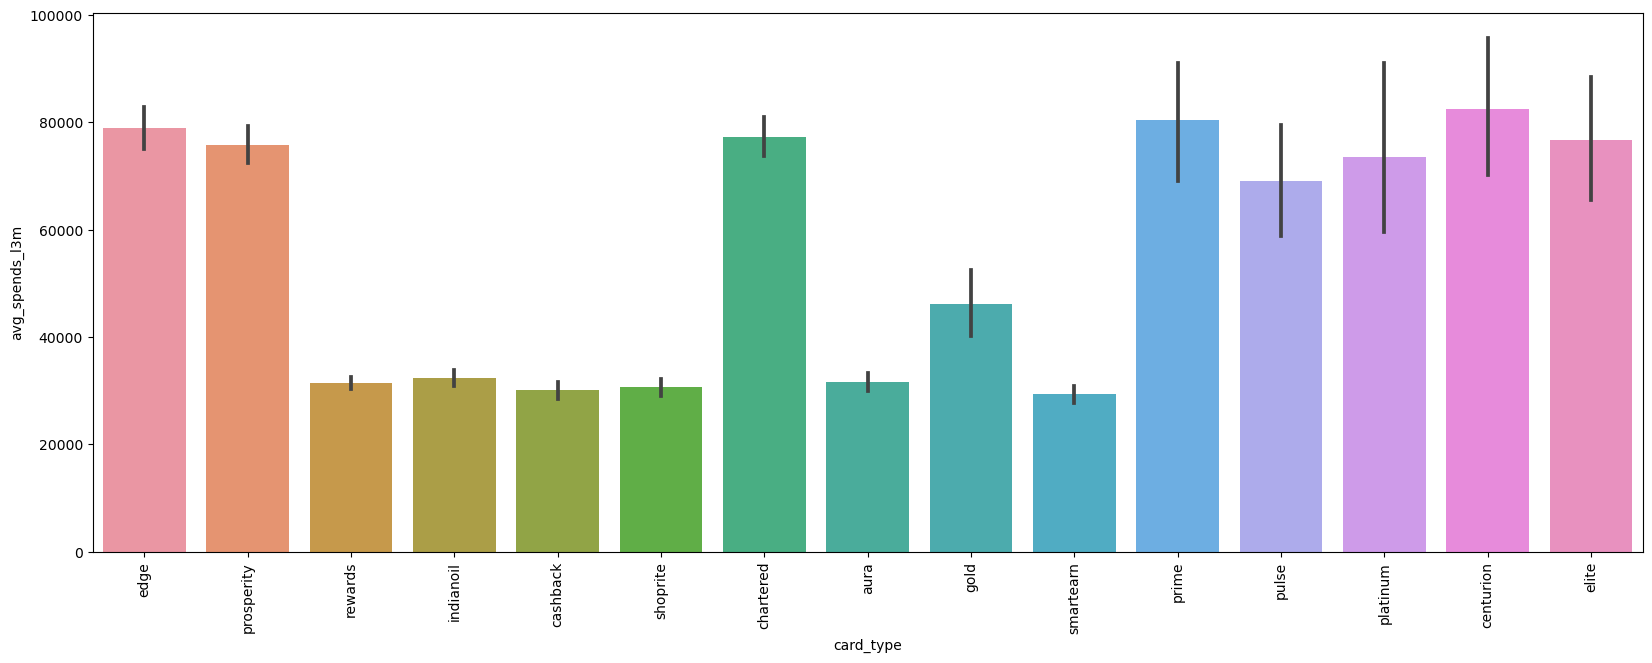

In [66]:
plt.figure(figsize=(20,7))
sns.barplot(data=df1, x="card_type", y="avg_spends_l3m");
plt.xticks(rotation=90)

###  Based on the above analysis Bank must to revisit its credit card policy for the user having occupation other than Salaries and Self Employed. So that the user from other occupations also increase the spends with the revise credit card policies and thus bank will make a profit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'edge'),
  Text(1, 0, 'prosperity'),
  Text(2, 0, 'rewards'),
  Text(3, 0, 'indianoil'),
  Text(4, 0, 'cashback'),
  Text(5, 0, 'shoprite'),
  Text(6, 0, 'chartered'),
  Text(7, 0, 'aura'),
  Text(8, 0, 'gold'),
  Text(9, 0, 'smartearn'),
  Text(10, 0, 'prime'),
  Text(11, 0, 'pulse'),
  Text(12, 0, 'platinum'),
  Text(13, 0, 'centurion'),
  Text(14, 0, 'elite')])

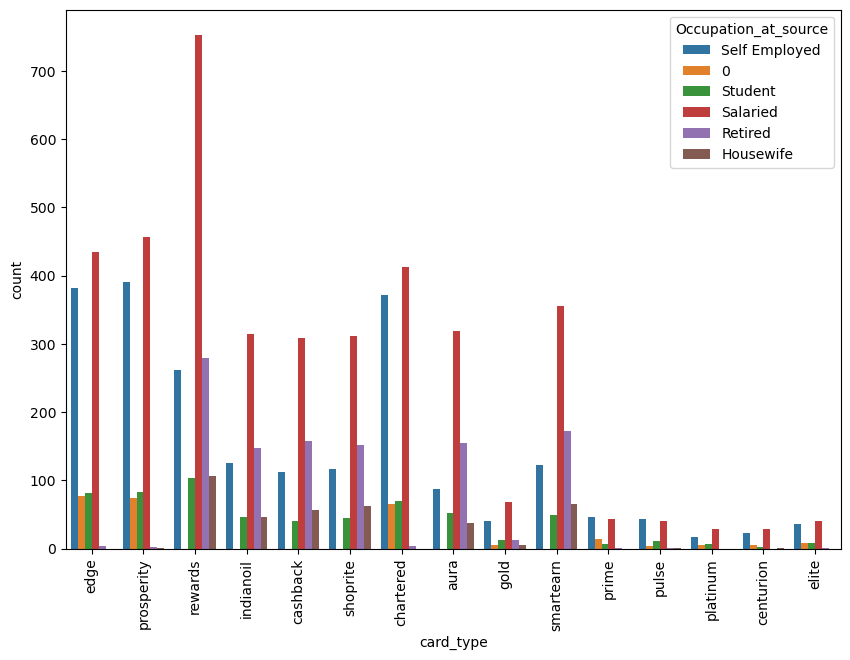

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='card_type',hue='Occupation_at_source')
plt.xticks(rotation=90)

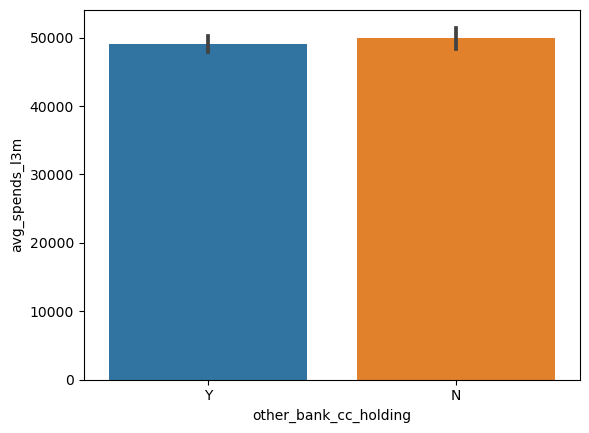

In [73]:
sns.barplot(data=df1, x="other_bank_cc_holding", y="avg_spends_l3m");

In [74]:
df1.groupby(['other_bank_cc_holding'])['avg_spends_l3m'].sum()

other_bank_cc_holding
N    186135917
Y    232271267
Name: avg_spends_l3m, dtype: int64

### Users having credit card from other banks are spending more and there is increase in avg_spends_l3m therefore bank can target the other users having credit card from other banks by providing attractive credit card policies

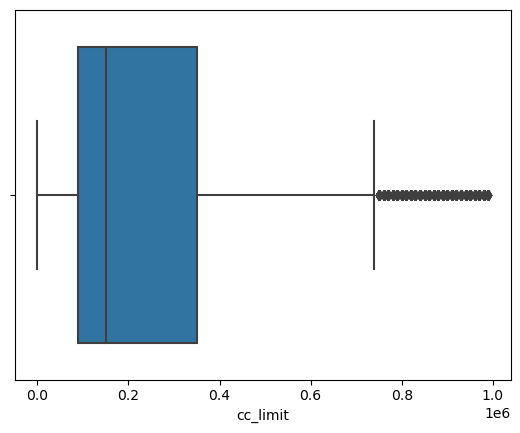

In [76]:
sns.boxplot(data=df1, x='cc_limit');

### From the below plot we see that 75% of customers are utilizing the credit upto the specified limit (350000), but few customer are having a credit card limit upto 1000000, So attract new customer by proving the credit limit of 350000 so that avg_spends_l3m will increase and bank will profit